In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import keras
from matplotlib import pyplot as plt

In [2]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('Data/train/',
                                                 target_size=(128,128),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_set = train_datagen.flow_from_directory('Data/test/',
                                            target_size=(128,128),
                                            batch_size=32,
                                            class_mode='categorical')

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [3]:
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [128, 128,3]),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 128)               6291584   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 6,302,250
Trainable params: 6,302,250
Non-trainable params: 0
_________________________________________________________________


In [4]:
model1.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy'])
history=model1.fit(train_generator,
                   epochs=30,
                    verbose=1,
                    validation_data=test_set)

model1.save("models/Knn.h5")

Epoch 1/30
1250/1250 [==============================] - 377s 301ms/step - loss: 0.8831 - accuracy: 0.7782 - val_loss: 0.3751 - val_accuracy: 0.8813
Epoch 2/30
1250/1250 [==============================] - 150s 120ms/step - loss: 0.3859 - accuracy: 0.8759 - val_loss: 0.3053 - val_accuracy: 0.9036
Epoch 3/30
1250/1250 [==============================] - 149s 119ms/step - loss: 0.3000 - accuracy: 0.9039 - val_loss: 0.2909 - val_accuracy: 0.9072
Epoch 4/30
1250/1250 [==============================] - 162s 130ms/step - loss: 0.2652 - accuracy: 0.9151 - val_loss: 0.2450 - val_accuracy: 0.9226
Epoch 5/30
1250/1250 [==============================] - 141s 112ms/step - loss: 0.2336 - accuracy: 0.9245 - val_loss: 0.3063 - val_accuracy: 0.9079
Epoch 6/30
1250/1250 [==============================] - 140s 112ms/step - loss: 0.2071 - accuracy: 0.9327 - val_loss: 0.3530 - val_accuracy: 0.8959
Epoch 7/30
1250/1250 [==============================] - 142s 114ms/step - loss: 0.1885 - accuracy: 0.9404 - val_

C:\Users\ymts0585\AppData\Local\Temp\ipykernel_13080\1417384216.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(history.history['accuracy'],'r',label='Testing accuracy',color='green')


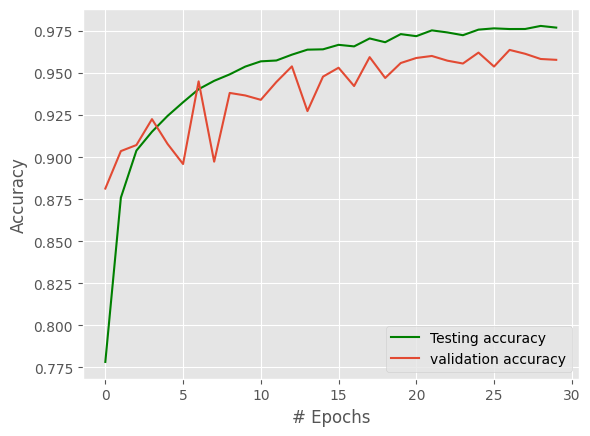

C:\Users\ymts0585\AppData\Local\Temp\ipykernel_13080\1417384216.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(history.history['loss'],'r',label='Testing loss',color='green')


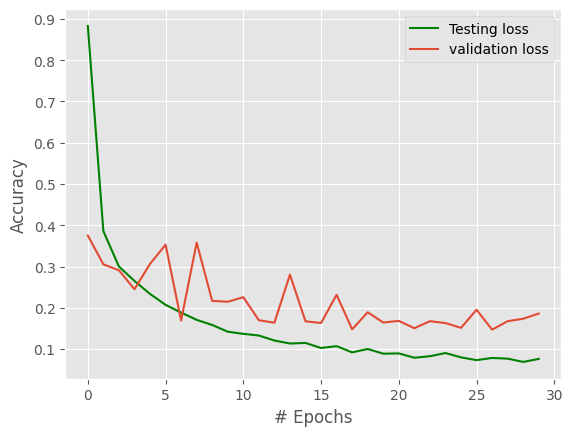

0.9770749807357788


In [5]:

plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='Testing accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("models/Knn_acc.png")
plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='Testing loss',color='green')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("models/knn_loss.png")
plt.show()


acc=history.history['accuracy'][-1]
print(acc)
